week 1 Income Prediction - EDA & Preprocessing

##  Dataset Description
- Adult Income Dataset
- Goal: Predict whether income >50K or <=50K
- Contains both categorical and numerical features

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
data=pd.read_csv("https://raw.githubusercontent.com/tech4alltraining/aiml/refs/heads/main/datasets/classification/adult.csv")

In [62]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [63]:
#determine no of rows and columns in the dataset
data.shape

(32561, 15)

In [64]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [65]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [66]:
#show the datatypes of each column
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [67]:
#generate summary statistics
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [68]:
categorical_cols=data.select_dtypes('object').columns.tolist()  #prints categorical coloumns
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [69]:
numerical_cols=data.select_dtypes('int64','float64').columns.tolist()
numerical_cols
   #prints numerical coloumns

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [70]:
data.nunique()

,0
age,73
workclass,9
fnlwgt,21648
education,16
education.num,16
marital.status,7
occupation,15
relationship,6
race,5
sex,2


In [71]:
#distinct value of each categorical feature
for col in categorical_cols:
  print(data[col].unique())

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Female' 'Male']
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germ

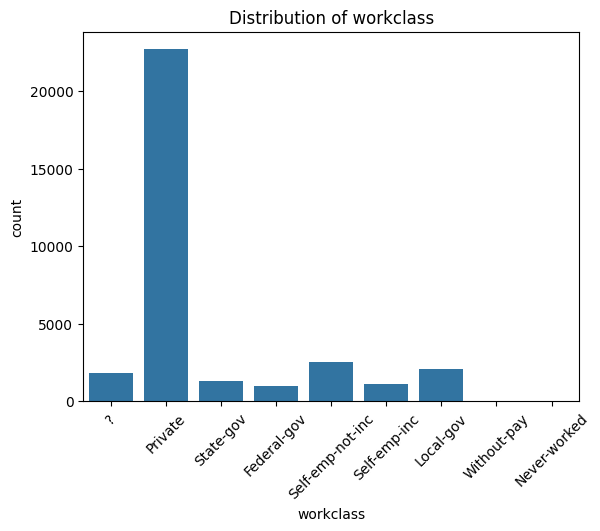

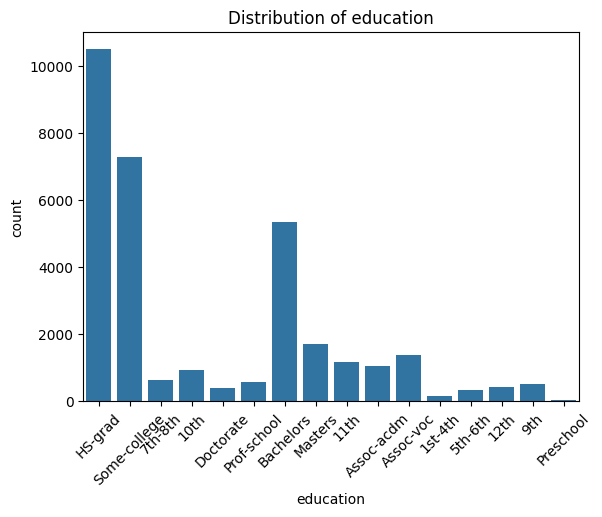

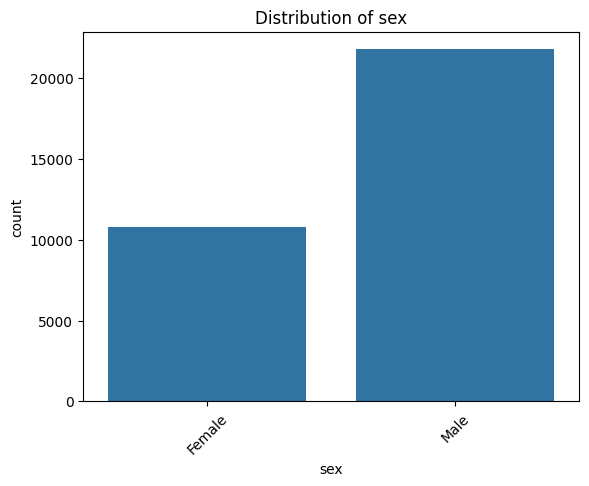

In [72]:
# visualize bar plot for any 3 categorical feature

categ = ['workclass', 'education', 'sex']
for col in categ:
    sns.countplot(x=data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

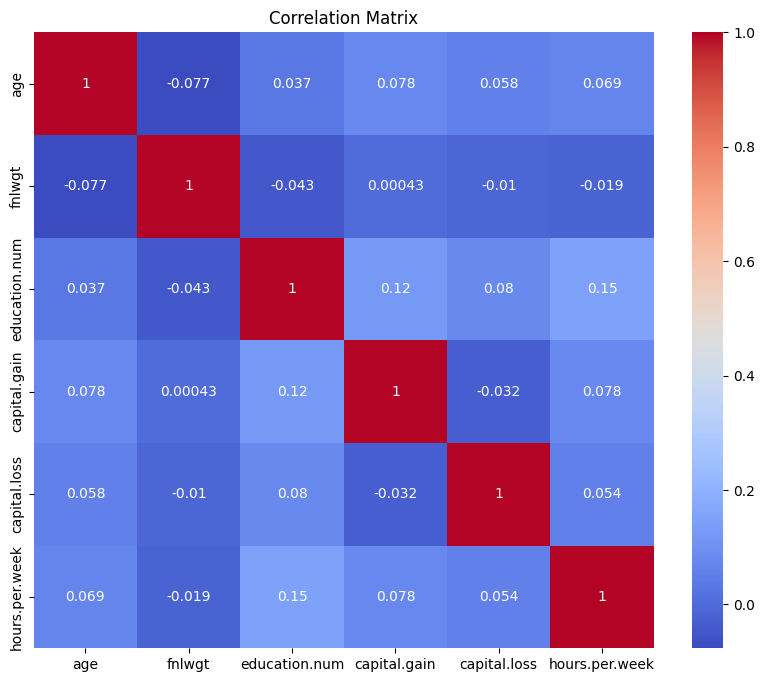

In [73]:

# Calculate correlation matrix
corr = data[numerical_cols].corr()
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

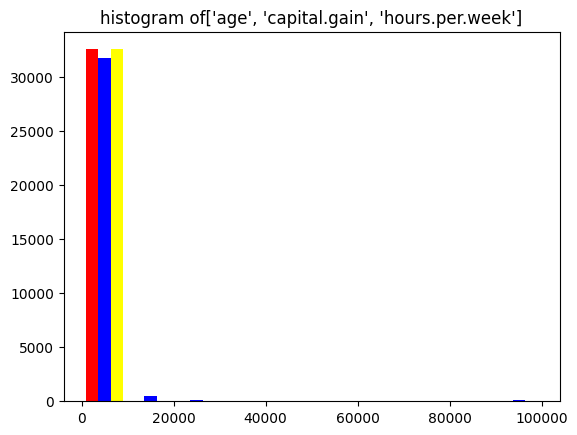

In [74]:
#Examine the distribution of at least three numerical features*.
features=['age','capital.gain','hours.per.week']
plt.hist(data[features],color=['red','blue','yellow'])
plt.title(f'histogram of{features}')
plt.show()

In [75]:
#Handle missing values
data.replace('?', np.nan, inplace=True)

In [76]:
data.isnull().sum()


,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [77]:

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-77-1294758982.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [78]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [79]:
#remove duplicated rows if applicable
data.duplicated().sum()

np.int64(24)

In [80]:
#drop unwanted columns
data.drop(columns=['fnlwgt'], inplace=True)


In [81]:
#remove duplicated rows if applicable
data.duplicated().sum()

np.int64(3591)

In [82]:
data.drop_duplicates(inplace=True)

In [83]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [84]:
#checking
data.duplicated().sum()

np.int64(0)

In [85]:
numerical_cols= data.select_dtypes('int64', 'float64').columns.tolist()

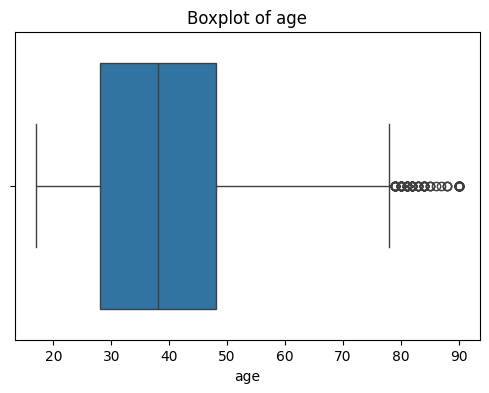

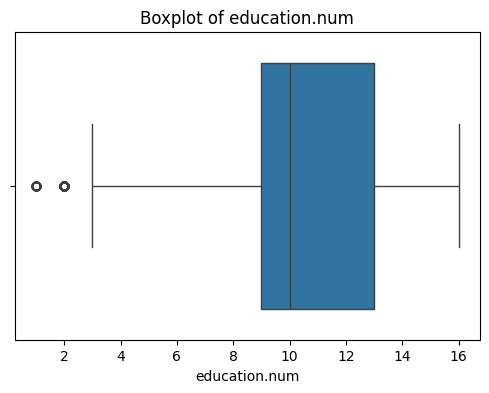

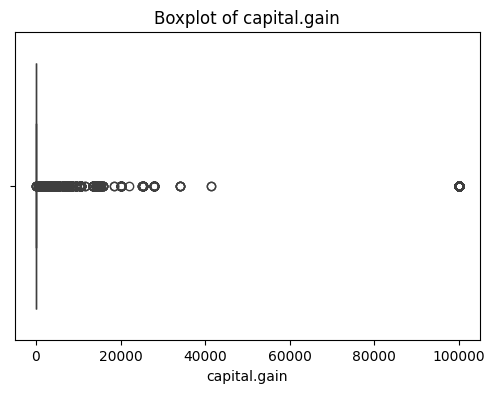

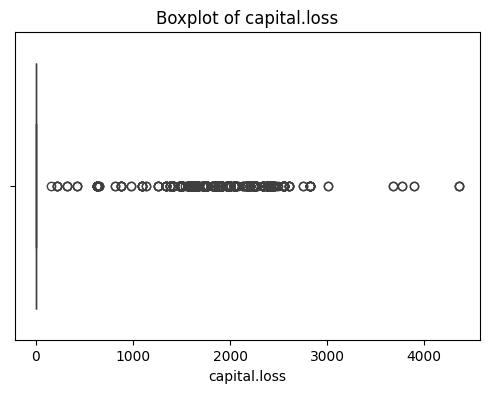

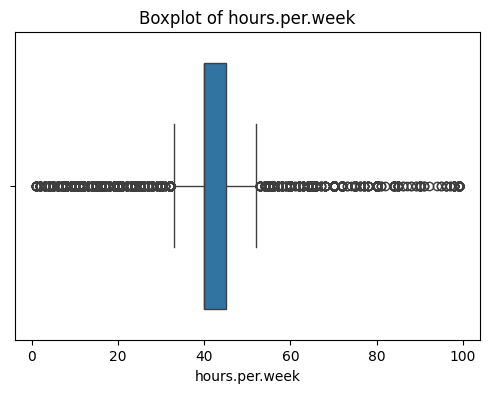

In [86]:
#detect and handle outliers
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [87]:
# detect and remove outliers
for col in numerical_cols:
#Identify the quartiles
  q1,q3=np.percentile(data[col],[25,75])
#Calculate the interquartile range
  iqr=q3-q1
#Calculate the lower and upper bounds
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  print(lower_bound, upper_bound)
# Drop the outliers
  data = data[(data[col] >= lower_bound)  & (data[col] <= upper_bound)]
data

-2.0 78.0
3.0 19.0
0.0 0.0
0.0 0.0
27.5 55.5


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4233,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4234,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4235,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4237,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [88]:
#Perform Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


In [89]:
#checking
data.dtypes

,0
age,int64
workclass,int64
education,int64
education.num,int64
marital.status,int64
occupation,int64
relationship,int64
race,int64
sex,int64
capital.gain,int64


In [90]:
#Apply feature scaling where necessary.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform numeric columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])



In [91]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,-0.041083,3,10,-0.411908,0,5,1,4,1,0.0,0.0,-0.222367,37,0
4233,1.167921,3,1,-1.211029,2,5,0,2,1,0.0,0.0,-0.222367,37,0
4234,-0.847086,3,8,1.186335,2,9,5,2,0,0.0,0.0,-0.222367,4,0
4235,-0.121684,3,11,1.585896,2,3,5,4,0,0.0,0.0,-0.222367,37,0
4237,1.087321,5,10,-0.411908,2,3,0,4,1,0.0,0.0,0.708328,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,0.361918,3,7,0.387214,2,11,0,4,1,0.0,0.0,0.708328,37,0
32555,1.167921,3,11,1.585896,2,3,0,4,1,0.0,0.0,-0.222367,37,1
32556,-1.330688,3,13,-0.012347,4,10,1,4,1,0.0,0.0,-0.222367,37,0
32557,-0.927686,3,6,0.786775,2,12,5,4,0,0.0,0.0,-0.594644,37,0


In [92]:
#checking
data.describe()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,1.909300e+04,19093.000000,19093.000000,1.909300e+04,19093.000000,19093.000000,19093.000000,19093.000000,19093.000000,19093.0,19093.0,1.909300e+04,19093.000000,19093.000000
mean,-5.451972e-17,3.047085,9.041062,3.308398e-16,2.554392,6.028597,1.515215,3.596135,0.649976,0.0,0.0,1.838413e-16,35.173310,0.201487
std,1.000026e+00,1.162627,3.394514,1.000026e+00,1.572315,4.012658,1.622968,0.914556,0.476990,0.0,0.0,1.000026e+00,6.360048,0.401122
min,-1.733689e+00,0.000000,0.000000,-2.809272e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-2.456034e+00,0.000000,0.000000
25%,-8.470861e-01,3.000000,8.000000,-4.119077e-01,2.000000,2.000000,0.000000,4.000000,0.000000,0.0,0.0,-2.223665e-01,37.000000,0.000000
50%,-1.216835e-01,3.000000,10.000000,-1.234698e-02,2.000000,6.000000,1.000000,4.000000,1.000000,0.0,0.0,-2.223665e-01,37.000000,0.000000
75%,6.843194e-01,3.000000,11.000000,7.867745e-01,4.000000,9.000000,3.000000,4.000000,1.000000,0.0,0.0,5.221894e-01,37.000000,0.000000
max,3.182928e+00,7.000000,13.000000,2.385017e+00,6.000000,13.000000,5.000000,4.000000,1.000000,0.0,0.0,2.569718e+00,39.000000,1.000000


## ✅ Preprocessing Completed
- Dataset is now cleaned, encoded, scaled and ready for ML model building.


📅Week 2
MODEL BUILDING AND TRAINING

In [93]:
#Split the data into training and testing sets (e.g., 80:20 split) and Show sample size(s) of each split
from sklearn.model_selection import train_test_split
#seperate input features(x) and target variable(y)
x=data.drop('income',axis=1)
y=data['income']
#Split the data into training and testing sets (80:20)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#Print the sizes of each split
print("training data size is:",x_train.shape)
print("testing data size is:",x_test.shape)


training data size is: (15274, 13)
testing data size is: (3819, 13)


In [94]:
print(data.shape)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19093, 14)
(19093, 13)
(19093,)
(15274, 13)
(15274,)
(3819, 13)
(3819,)


In [95]:
#trainig the models

In [96]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

#Create the model
lr_model = LogisticRegression(max_iter=1000)

#Train the model
lr_model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [97]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#create model
knn_model = KNeighborsClassifier(n_neighbors=5)
#train model
knn_model.fit(x_train, y_train)


KNeighborsClassifier()

In [98]:
#SVM support vector mmachine
from sklearn.svm import SVC
#create
svm_model=SVC(kernel='linear')
#train
svm_model.fit(x_train,y_train)


SVC(kernel='linear')

In [99]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
#create
nb_model=GaussianNB()
#train
nb_model.fit(x_train,y_train)

GaussianNB()

In [100]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
#create
dt_model=DecisionTreeClassifier()
#train
dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [101]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
#create
rf_model=RandomForestClassifier(n_estimators=200)
#train
rf_model.fit(x_train,y_train)



RandomForestClassifier(n_estimators=200)

In [102]:
#MLP classifier(neural network)
from sklearn.neural_network import MLPClassifier
#create
mlp_model=MLPClassifier(hidden_layer_sizes=(10,10,5), max_iter=1000, random_state=42)
#Train
mlp_model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 5), max_iter=1000, random_state=42)

In [103]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#create
gb_model=GradientBoostingClassifier()
#train
gb_model.fit(x_train,y_train)


GradientBoostingClassifier()

In [104]:
#XGboost Classifier
from xgboost import XGBClassifier
#create
xgb_model=XGBClassifier()
#train
xgb_model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [105]:
#prediction using all models

In [106]:
#Logistic regression
ypred_lr=lr_model.predict(x_test)
ypred_lr

array([0, 1, 0, ..., 1, 0, 0])

In [107]:
#KNN
ypred_knn=knn_model.predict(x_test)
ypred_knn

array([0, 1, 0, ..., 1, 1, 0])

In [108]:
#svm
ypred_svm=svm_model.predict(x_test)
ypred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
#Naive bayes
ypred_nb=nb_model.predict(x_test)
ypred_nb


array([0, 1, 1, ..., 1, 0, 0])

In [110]:
#decison tree
ypred_dt=dt_model.predict(x_test)
ypred_dt

array([0, 1, 1, ..., 1, 0, 0])

In [111]:
#random forest
ypred_rf=rf_model.predict(x_test)
ypred_rf

array([0, 1, 0, ..., 1, 1, 0])

In [112]:
#MLP classifier
ypred_mlp=mlp_model.predict(x_test)
ypred_mlp

array([0, 1, 0, ..., 1, 0, 0])

In [113]:
#Gradient boosting classifier
ypred_gb=gb_model.predict(x_test)
ypred_gb

array([0, 1, 0, ..., 1, 0, 0])

In [114]:
#xgboost classifier
ypred_xgb=xgb_model.predict(x_test)
ypred_xgb

array([0, 0, 0, ..., 1, 0, 0])

**✅**MODELS BUILDING,TRAINING AND PREDICTION COMPLETED

**📅**WEEK 3  Model Evaluation, Comparison, and Conclusion

In [115]:
#model evaluation
#accuracy score,classification report,confusion matrix(visualization)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

0.8159203980099502
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3065
           1       0.57      0.27      0.37       754

    accuracy                           0.82      3819
   macro avg       0.71      0.61      0.63      3819
weighted avg       0.79      0.82      0.79      3819

[[2911  154]
 [ 549  205]]


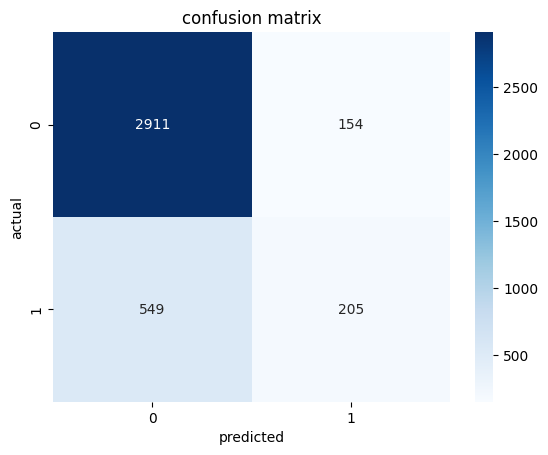

In [116]:
#logistic regression
print(accuracy_score(y_test,ypred_lr))
print(classification_report(y_test,ypred_lr))
cm=confusion_matrix(y_test,ypred_lr)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.8167059439643886
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3065
           1       0.54      0.47      0.50       754

    accuracy                           0.82      3819
   macro avg       0.71      0.69      0.70      3819
weighted avg       0.81      0.82      0.81      3819

[[2762  303]
 [ 397  357]]


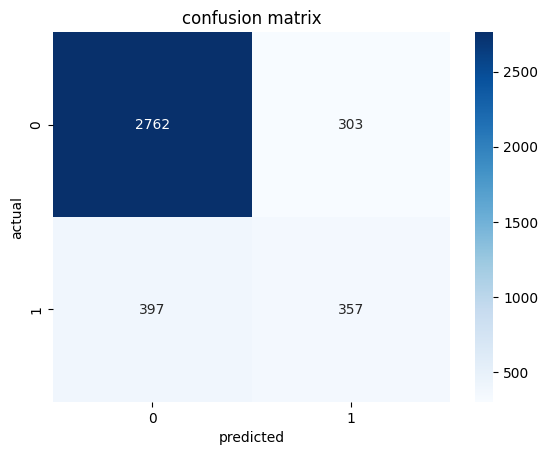

In [117]:
#KNN
print(accuracy_score(y_test,ypred_knn))
print(classification_report(y_test,ypred_knn))
cm=confusion_matrix(y_test,ypred_knn)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.8025661167844985
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3065
           1       0.00      0.00      0.00       754

    accuracy                           0.80      3819
   macro avg       0.40      0.50      0.45      3819
weighted avg       0.64      0.80      0.71      3819

[[3065    0]
 [ 754    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


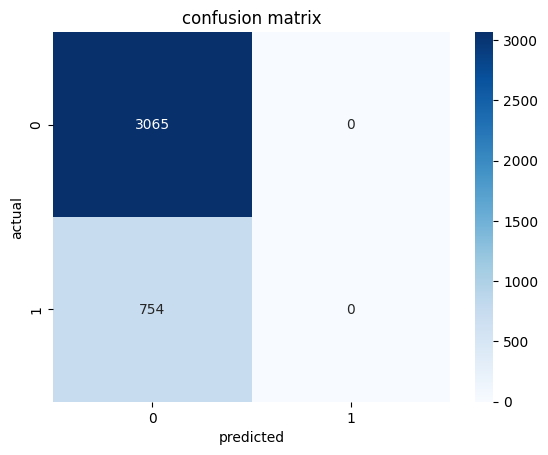

In [118]:
#SVM
print(accuracy_score(y_test,ypred_svm))
print(classification_report(y_test,ypred_svm))
cm=confusion_matrix(y_test,ypred_svm)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.7910447761194029
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      3065
           1       0.48      0.64      0.55       754

    accuracy                           0.79      3819
   macro avg       0.69      0.74      0.71      3819
weighted avg       0.82      0.79      0.80      3819

[[2535  530]
 [ 268  486]]


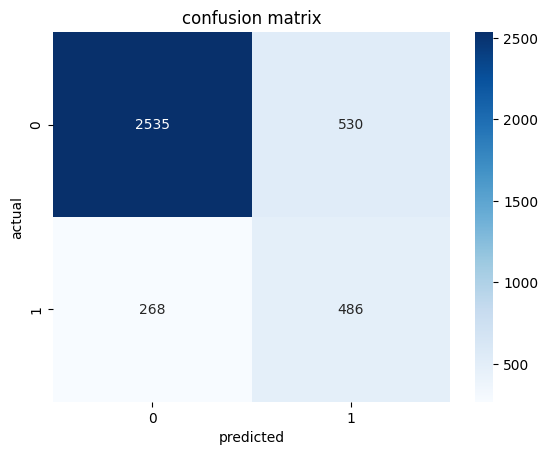

In [119]:
#Naive bayes
print(accuracy_score(y_test,ypred_nb))
print(classification_report(y_test,ypred_nb))
cm=confusion_matrix(y_test,ypred_nb)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.7661691542288557
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3065
           1       0.41      0.41      0.41       754

    accuracy                           0.77      3819
   macro avg       0.63      0.63      0.63      3819
weighted avg       0.77      0.77      0.77      3819

[[2620  445]
 [ 448  306]]


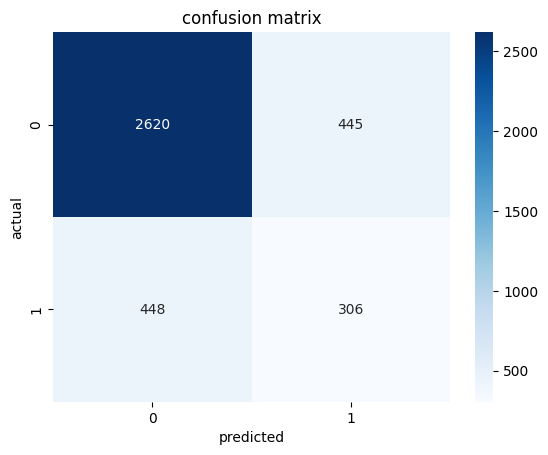

In [120]:
#decision tree
print(accuracy_score(y_test,ypred_dt))
print(classification_report(y_test,ypred_dt))
cm=confusion_matrix(y_test,ypred_dt)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.8070175438596491
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3065
           1       0.51      0.44      0.47       754

    accuracy                           0.81      3819
   macro avg       0.69      0.67      0.68      3819
weighted avg       0.80      0.81      0.80      3819

[[2750  315]
 [ 422  332]]


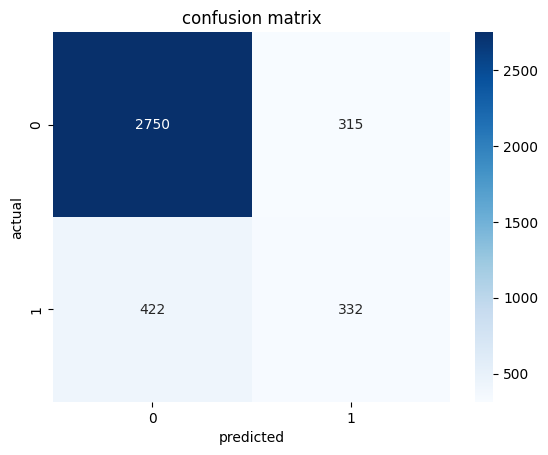

In [121]:
#Random forest
print(accuracy_score(y_test,ypred_rf))
print(classification_report(y_test,ypred_rf))
cm=confusion_matrix(y_test,ypred_rf)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.8305839224927991
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3065
           1       0.63      0.35      0.45       754

    accuracy                           0.83      3819
   macro avg       0.74      0.65      0.67      3819
weighted avg       0.81      0.83      0.81      3819

[[2910  155]
 [ 492  262]]


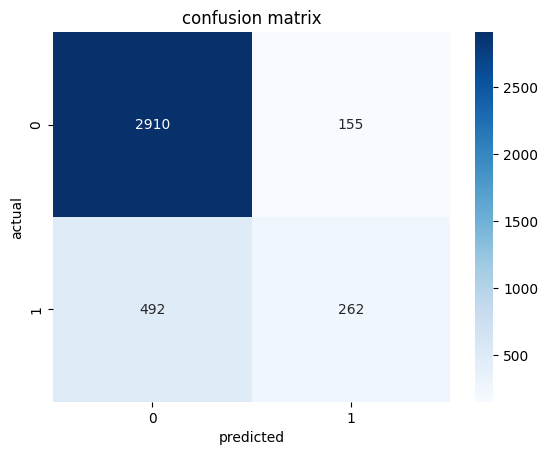

In [122]:
#MLP classifier
print(accuracy_score(y_test,ypred_mlp))
print(classification_report(y_test,ypred_mlp))
cm=confusion_matrix(y_test,ypred_mlp)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.838701230688662
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3065
           1       0.62      0.47      0.53       754

    accuracy                           0.84      3819
   macro avg       0.75      0.70      0.72      3819
weighted avg       0.83      0.84      0.83      3819

[[2849  216]
 [ 400  354]]


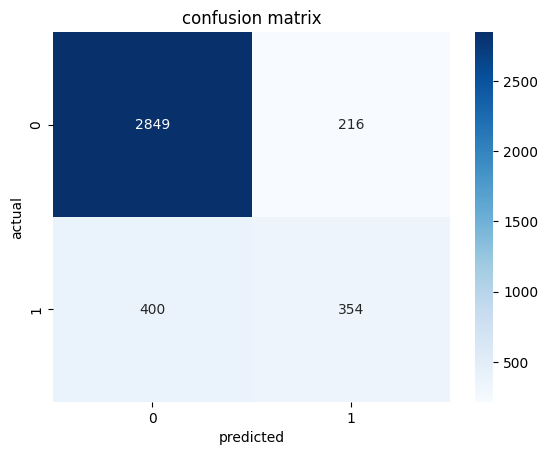

In [123]:
#gradient boosting classifier
print(accuracy_score(y_test,ypred_gb))
print(classification_report(y_test,ypred_gb))
cm=confusion_matrix(y_test,ypred_gb)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

0.8329405603561142
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3065
           1       0.59      0.49      0.54       754

    accuracy                           0.83      3819
   macro avg       0.74      0.71      0.72      3819
weighted avg       0.82      0.83      0.83      3819

[[2808  257]
 [ 381  373]]


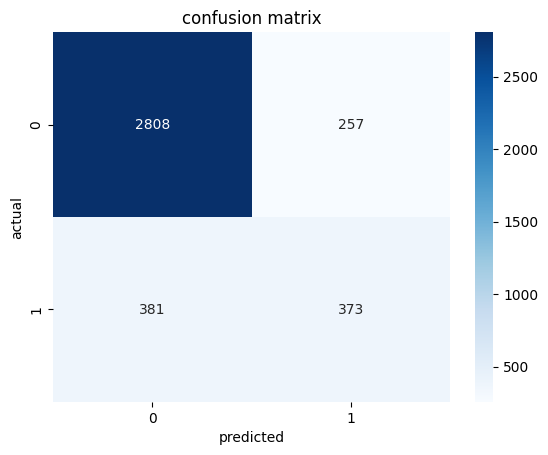

In [124]:
#xgboost classifier
print(accuracy_score(y_test,ypred_xgb))
print(classification_report(y_test,ypred_xgb))
cm=confusion_matrix(y_test,ypred_xgb)
print(cm)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [125]:
#HYPERPARAMETER TUNING

In [126]:
#KNN
for k in [3,5,7,9]:
  model=KNeighborsClassifier(n_neighbors=k)#object created
  model.fit(x_train,y_train)#train
  ypred1_knn=model.predict(x_test)#prediction
  #evaluation
  print(accuracy_score(y_test,ypred1_knn))
  print(classification_report(y_test,ypred1_knn))



0.8025661167844985
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3065
           1       0.50      0.48      0.49       754

    accuracy                           0.80      3819
   macro avg       0.69      0.68      0.68      3819
weighted avg       0.80      0.80      0.80      3819

0.8167059439643886
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3065
           1       0.54      0.47      0.50       754

    accuracy                           0.82      3819
   macro avg       0.71      0.69      0.70      3819
weighted avg       0.81      0.82      0.81      3819

0.8235140089028542
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3065
           1       0.56      0.47      0.51       754

    accuracy                           0.82      3819
   macro avg       0.72      0.69      0.70      3819
weighted avg     

Accuracy improved with higher k, best at k=7 (83%).

Performed well on class 0, but struggled to detect class 1 (low recall ~47%).

Simple and effective, but sensitive to class imbalance.




In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Define model
knn = KNeighborsClassifier()

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 is Manhattan, p=2 is Euclidean distance
}

# Step 3: Setup GridSearch
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Step 4: Fit it to the data
grid.fit(x_train, y_train)

# Step 5: Results
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Accuracy on training folds:", round(grid.best_score_ * 100, 2), "%")

# Step 6: Evaluate on test set
y_pred = grid.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("\n✅ Test Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print(classification_report(y_test, y_pred))


✅ Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
✅ Best Accuracy on training folds: 82.83 %

✅ Test Accuracy: 82.33 %
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3065
           1       0.56      0.47      0.51       754

    accuracy                           0.82      3819
   macro avg       0.72      0.69      0.70      3819
weighted avg       0.81      0.82      0.82      3819



In [128]:
#SVM
for kernel in ['linear','rbf','poly']:
  model=SVC(kernel=kernel,class_weight='balanced')
  model.fit(x_train,y_train)
  ypred1_svm=model.predict(x_test)
  print(accuracy_score(y_test,ypred1_svm))
  print(classification_report(y_test,ypred1_svm))

0.7090861482063368
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      3065
           1       0.38      0.78      0.52       754

    accuracy                           0.71      3819
   macro avg       0.66      0.74      0.65      3819
weighted avg       0.82      0.71      0.74      3819

0.7020162346163917
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      3065
           1       0.38      0.81      0.52       754

    accuracy                           0.70      3819
   macro avg       0.66      0.74      0.65      3819
weighted avg       0.82      0.70      0.73      3819

0.7255826132495418
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      3065
           1       0.40      0.78      0.53       754

    accuracy                           0.73      3819
   macro avg       0.67      0.75      0.67      3819
weighted avg     



since our dataset is unbalanced and class 0 is greater,class 1 is not recognized therefore we balanced the class weight.

Best when using kernel='poly' with class balancing.

In [129]:
#random forest
for n_estimators in [50,100,150]:
  model=RandomForestClassifier(n_estimators=n_estimators,random_state=42)
  model.fit(x_train,y_train)
  ypred1_rf=model.predict(x_test)
  print(accuracy_score(y_test,ypred1_rf))
  print(classification_report(y_test,ypred1_rf))


0.8085886357685258
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3065
           1       0.52      0.45      0.48       754

    accuracy                           0.81      3819
   macro avg       0.69      0.67      0.68      3819
weighted avg       0.80      0.81      0.80      3819

0.8104215763288819
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3065
           1       0.52      0.45      0.48       754

    accuracy                           0.81      3819
   macro avg       0.70      0.67      0.68      3819
weighted avg       0.80      0.81      0.80      3819

0.8080649384655669
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3065
           1       0.52      0.45      0.48       754

    accuracy                           0.81      3819
   macro avg       0.69      0.67      0.68      3819
weighted avg     

Among the tested values, n_estimators=100 gave the best overall balance of accuracy and minority class detection.

| **Model**              | **Hyperparameter(s)**       | **Accuracy (%)** | **Precision** | **Recall** | **F1-Score** |
| ---------------------- | --------------------------- | ---------------- | ------------- | ---------- | ------------ |
| Logistic Regression    | —                           | 81.5             | 0.79          | 0.82       | 0.79         |
| kNN                    |k=3                          | 80.2             | 0.80          |0.80        |0.80          |          
| kNN                    | k = 5                       | 81.6             | 0.81          | 0.82       | 0.81         |
| kNN                    | k = 7                       | 82.35            | 0.81          | 0.82       | 0.82         |
| kNN                    | k = 9                       | 82.32            | 0.81          | 0.82       | 0.82         |
| SVM                    | kernel = 'linear'           | 70.9             | 0.82          | 0.71       | 0.74         |
| SVM                    | kernel = 'rbf'              | 70.2             | 0.82          | 0.70       | 0.73         |
| SVM                    | kernel = 'poly'             |72.5              | 0.83          | 0.73       |0.75          |
| Decision Tree          | ---          | 76.3         | 0.76             | 0.76          | 0.76       |
| Random Forest          | n_estimators = 50           | 80.8             | 0.80          | 0.81       | 0.80         |
| Random Forest          | n_estimators = 100          | 81.0             | 0.80          | 0.81       | 0.80         |
| Random Forest          | n_estimators = 150          | 80.8             | 0.80          | 0.81       | 0.80         |
| Naive Bayes (Gaussian) | —                           | 79.1             | 0.82          | 0.79       | 0.80         |
| MLP Classifier         | ---          | 83.0         | 0.81             | 0.83          | 0.81       |
| Gradient Boosting      | ---          | 83.8         | 0.83             | 0.84          | 0.83       |
| XGBoost                | ---          | 83.5         | 0.83             | 0.84          | 0.83       |


Multiple machine learning models were evaluated for income classification using metrics such as Accuracy, Precision, Recall, and F1-Score.

The dataset had non-linear patterns and slight class imbalance, requiring models that balance accuracy and generalization.

 Top Performers:
Gradient Boosting and XGBoost delivered the highest performance across all metrics:

Accuracy: 83.5–83.8%

F1-Score: 0.83 (well-balanced across classes)

MLP Classifier also showed strong generalization with:

Accuracy: 83.0%

F1-Score: 0.81

 Moderate Performers:
k-Nearest Neighbors (k=7, 9):
Reliable with F1-Score: 0.82; simple but effective baseline model.

Logistic Regression:
Competitive accuracy (81.5%) with good interpretability.

 Underperformers:
Support Vector Machines (SVM):
Lower accuracy (~70–72%) and poor recall due to possible feature scaling issues or class imbalance.

Decision Tree:
Prone to overfitting; accuracy limited to ~76%.

 Conclusion:
Gradient Boosting and XGBoost are recommended as the final models due to their high accuracy, balanced precision-recall, and robustness across different performance metrics. They are most suitable for deployment in this income classification ta

In this project, multiple machine learning models were built, trained, and evaluated to predict whether an individual earns more than 50K per year based on demographic and employment-related features.

Through extensive experimentation and comparative analysis, Gradient Boosting and XGBoost emerged as the most effective models, achieving high accuracy and balanced classification performance.

These models demonstrated the ability to generalize well, especially in handling class imbalance and non-linear relationships within the data, making them highly suitable for real-world deployment in income classification systems.

In [130]:
import joblib

# Save the Gradient Boost model
joblib.dump(gb_model, "income_model.pkl")
print("Gradient Boost model saved as income_model.pkl")


Gradient Boost model saved as income_model.pkl


In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Define categorical and numerical columns
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation',
                    'relationship', 'race', 'sex', 'native.country']
numeric_cols = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Preprocess: OneHot for categoricals, passthrough for numerics
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

# Create pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', gb_model)
])

# Fit pipeline on training data (X_train = your features, y_train = target)
pipeline.fit(x_train, y_train)

# Save pipeline
import joblib
joblib.dump(pipeline, "income_pipeline.pkl")


['income_pipeline.pkl']

In [134]:
from google.colab import files
files.download("income_pipeline.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>